In order to investigate the feasibility of starting a Sunday edition for a large metropolitan newspaper, information was obtained from a sample of 34 newspapers concerning their daily and Sunday circulation (in thousands)



*   So here we are going to predict the Sunday sales based on daily sales
*   Y(Sunday Sales) = m*x(daily sales) + C



In [ ]:
#Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [ ]:
#Read data
df = pd.read_csv('/content/NewspaperData.csv')
df.head(10)

,Newspaper,daily,sunday
0,Baltimore Sun,391.952,488.506
1,Boston Globe,516.981,798.298
2,Boston Herald,355.628,235.084
3,Charlotte Observer,238.555,299.451
4,Chicago Sun Times,537.780,559.093
5,Chicago Tribune,733.775,1133.249
6,Cincinnati Enquirer,198.832,348.744
7,Denver Post,252.624,417.779
8,Des Moines Register,206.204,344.522
9,Hartford Courant,231.177,323.084


In [ ]:
# Selecting relevent Columns
# Here name of the newpaper is not contributing to the prediction so we can neglect it

df1 = df[['daily','sunday']]
df1.head()


,daily,sunday
0,391.952,488.506
1,516.981,798.298
2,355.628,235.084
3,238.555,299.451
4,537.780,559.093


In [ ]:
#Data description

df1.describe()

,daily,sunday
count,34.000000,34.000000
mean,430.962471,591.202412
std,269.211470,376.418051
min,133.239000,202.614000
25%,233.021500,327.769500
50%,355.235500,436.712500
75%,516.616500,699.735250
max,1209.225000,1762.015000


In [ ]:
#mean > median so positive skewness/right skewed
#we can see using a distibution plot

<AxesSubplot:xlabel='daily', ylabel='Density'>

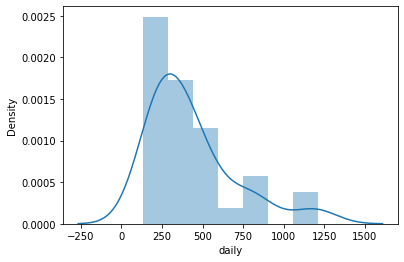

In [ ]:
sns.distplot(df1['daily'])

<AxesSubplot:xlabel='sunday', ylabel='Density'>

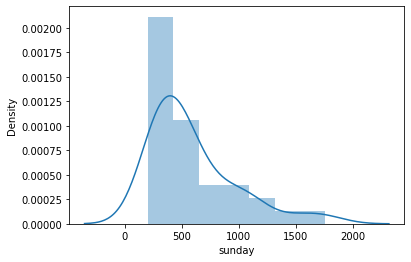

In [ ]:
sns.distplot(df1['sunday'])

In [ ]:
#Correlation Analysis

df1.corr()

,daily,sunday
daily,1.000000,0.958154
sunday,0.958154,1.000000


In [ ]:
#so the correlation is about 96%, which means daily sales is highly contributing to find the sunday sales

<AxesSubplot:>

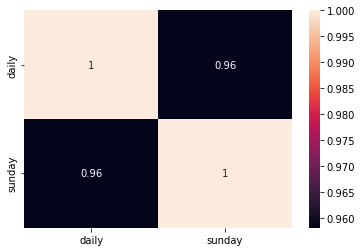

In [ ]:
sns.heatmap(df1.corr(), annot=True)

<AxesSubplot:xlabel='daily', ylabel='sunday'>

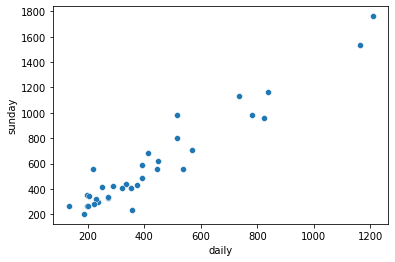

In [ ]:
# If we scatter plot

sns.scatterplot(x = df1['daily'], y = df1['sunday'])

In [ ]:
#Import statsmodels

import statsmodels.formula.api as smf

In [ ]:
# Train the model

model = smf.ols ('sunday~daily', data = df1).fit()
model

<AxesSubplot:xlabel='daily', ylabel='sunday'>

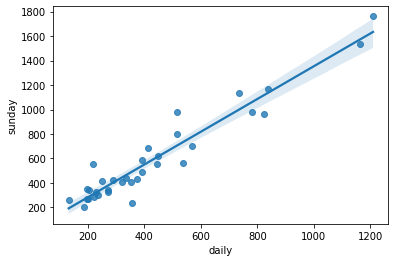

In [ ]:
#Regression plot

sns.regplot(x= df1['daily'], y= df1['sunday'], data =df1)

In [ ]:
# To check the m & c it has taken
# Model params

model.params

Intercept    13.835630
daily         1.339715
dtype: float64

In [ ]:
# line equation
# y = mx + c
# if i want to prectic the sunday sale for a daily sale value of 300  

y = (1.339715*300) + 13.835630
y


415.75012999999996

In [ ]:
# To find the accuracy of the model we use r^2 value

model.rsquared   #(or) adjusted r^2

0.9180596895873295

In [ ]:
model.rsquared_adj

0.9154990548869336

In [ ]:
# model is around 92% accurate

In [ ]:
#Print p value
# here intercept = c, daily = m = slope 
print('t_value =', '\n', model.tvalues,'\n', 'p_value = ','\n', model.pvalues)

t_value = 
 Intercept     0.386427
daily        18.934840
dtype: float64 
 p_value =  
 Intercept    7.017382e-01
daily        6.016802e-19
dtype: float64


In [ ]:
# Predicting new data

newdata = pd.Series([200,400,600])
newdata

0    200
1    400
2    600
dtype: int64

In [ ]:
newdf=pd.DataFrame(newdata, columns = ['daily'])
newdf

,daily
0,200
1,400
2,600


In [ ]:
model.predict(newdf)

0    281.778581
1    549.721533
2    817.664485
dtype: float64

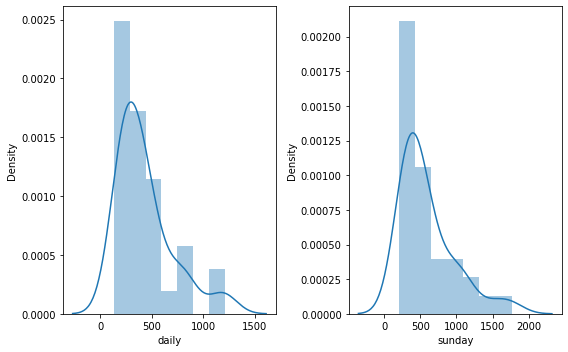

In [ ]:
plt.rcParams['figure.figsize'] = (8,5)

plt.subplot(121)
sns.distplot(df['daily'])
plt.subplot(122)
sns.distplot(df['sunday'])

plt.tight_layout()

# **Log Transformation**

In [ ]:
df1['log_daily'] = np.log(df1['daily'])
df1.head()

,daily,sunday,log_daily
0,391.952,488.506,5.971139
1,516.981,798.298,6.248006
2,355.628,235.084,5.873885
3,238.555,299.451,5.474600
4,537.780,559.093,6.287450


In [ ]:
df1['log_sunday'] = np.log(df1['sunday'])
df1.head()

,daily,sunday,log_daily,log_sunday
0,391.952,488.506,5.971139,6.191352
1,516.981,798.298,6.248006,6.682482
2,355.628,235.084,5.873885,5.459943
3,238.555,299.451,5.474600,5.701951
4,537.780,559.093,6.287450,6.326316


<AxesSubplot:xlabel='log_sunday', ylabel='Density'>

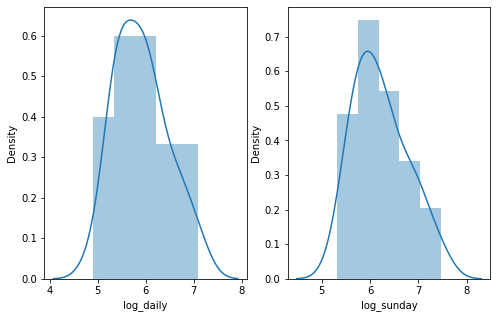

In [ ]:
plt.subplot(121)
sns.distplot(df1['log_daily'])

plt.subplot(122)
sns.distplot(df1['log_sunday'])

In [ ]:
df1['log_daily'].skew()

0.4682202000020356

In [ ]:
df1['sqrt_daily'] = np.sqrt(df1['daily'])
df1.head()

,daily,sunday,log_daily,log_sunday,sqrt_daily
0,391.952,488.506,5.971139,6.191352,19.797778
1,516.981,798.298,6.248006,6.682482,22.737216
2,355.628,235.084,5.873885,5.459943,18.858102
3,238.555,299.451,5.474600,5.701951,15.445226
4,537.780,559.093,6.287450,6.326316,23.190084


In [ ]:
df1['sqrt_sunday'] = np.sqrt(df1['sunday'])
df1.head()

,daily,sunday,log_daily,log_sunday,sqrt_daily,sqrt_sunday
0,391.952,488.506,5.971139,6.191352,19.797778,22.102172
1,516.981,798.298,6.248006,6.682482,22.737216,28.254168
2,355.628,235.084,5.873885,5.459943,18.858102,15.332449
3,238.555,299.451,5.474600,5.701951,15.445226,17.304653
4,537.780,559.093,6.287450,6.326316,23.190084,23.645147


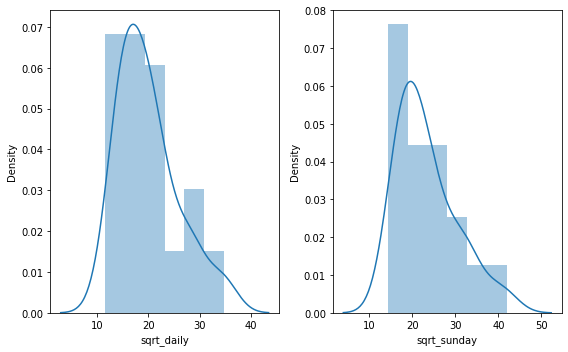

In [ ]:
plt.subplot(121)
sns.distplot(df1['sqrt_daily'])

plt.subplot(122)
sns.distplot(df1['sqrt_sunday'])

plt.tight_layout()

In [ ]:
df1['sqrt_sunday'].skew()

1.0392935145699538